In [206]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

In [207]:
#트레이닝 데이터 가져오기
train = pd.read_csv('data/titanic/train.csv')
#테스트 데이터 가져오기
test = pd.read_csv('data/titanic/test.csv')
train.head()
#PassengerId = 승객 ID
#Survived = 생존
#Pclass = 1,2,3 등석
#sibsp = 함깨탄 사람 수
#parch = 함깨탄 가족 수
#Fare = 요금
#Cabin = 객실

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:xlabel='Pclass', ylabel='count'>

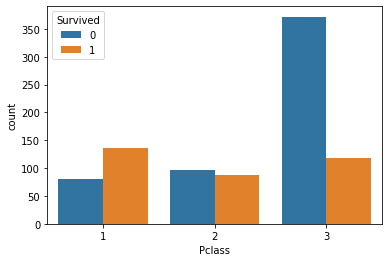

In [208]:
sns.countplot(data=train, x="Pclass",hue="Survived") #Pclass에 대한 데이터 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

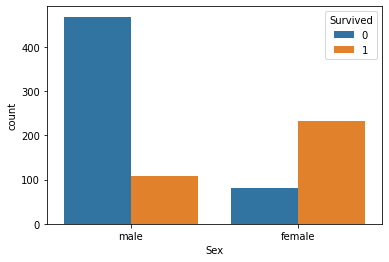

In [209]:
sns.countplot(data=train, x="Sex",hue="Survived") #Sex 대한 데이터 시각화

In [210]:
train.Sex = train.Sex.replace('male',0)
train.Sex = train.Sex.replace('female',1)
test.Sex = test.Sex.replace('male',0)
test.Sex = test.Sex.replace('female',1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [211]:
feature_name = ['Pclass','Sex']
x = train[feature_name]
print(x)

     Pclass  Sex
0         3    0
1         1    1
2         3    1
3         1    1
4         3    0
..      ...  ...
886       2    0
887       1    1
888       3    1
889       1    0
890       3    0

[891 rows x 2 columns]


In [212]:
target = "Survived"
y = train[target]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [213]:
model = DecisionTreeClassifier(max_depth=6)

In [214]:
model.fit(x,y)

DecisionTreeClassifier(max_depth=6)

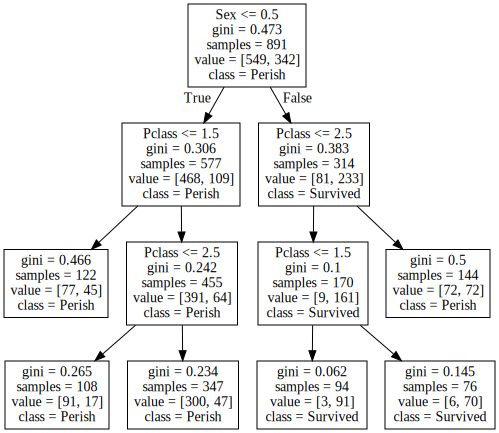

In [218]:
tree = export_graphviz(model,feature_names=feature_name,
                      class_names=["Perish","Survived"])
graphviz.Source(tree)

In [216]:
x_test=test[feature_name] #Pclass
met = model.predict(x_test)
met

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [217]:
a = pd.read_csv('data/titanic/gender_submission.csv')
a['Survived'] = met #원래 제출 데이터의 Survived을 met의 값으로 바꿈
a.to_csv("decision-tree.csv", index=False) #인덱스가 있으면 제출에서 오류가 난다
a

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]